In [1]:
import os
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import EfficientNetB0


In [2]:
os.chdir('/content/drive/MyDrive/IQ_gateway_Assignment')

In [3]:
dataset = '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/'

In [4]:
Uninfected_path = '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Uninfected/'
infected_path = '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/'

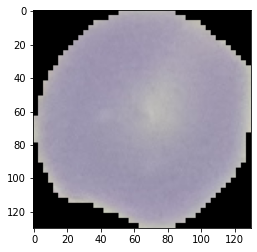

In [ ]:
#let's explore the images
image_uninfected = cv2.imread('/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Uninfected/C241NThinF_IMG_20151207_124608_cell_171.png')
image_uninfected = cv2.cvtColor(image_uninfected, cv2.COLOR_BGR2RGB)
image_uninfected.shape
plt.imshow(image_uninfected)

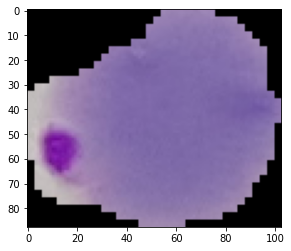

In [ ]:
image_parasitized = cv2.imread('/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C189P150ThinF_IMG_20151203_142224_cell_88.png')
image_parasitized = cv2.cvtColor(image_parasitized, cv2.COLOR_BGR2RGB)
image_parasitized.shape
plt.imshow(image_parasitized)

In [5]:
_delete=os.listdir(Uninfected_path)[1000:]  # Take the last  images
for file_ in _delete:
    os.remove(os.path.join(Uninfected_path, file_))

In [6]:
_delete=os.listdir(infected_path)[1000:]  # Take the last  images
for file_ in _delete:
    os.remove(os.path.join(infected_path, file_))

In [7]:
parasitized_l = os.listdir('/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized')
uninfected_l = os.listdir('/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Uninfected')
print(f'parasitized cell images = {len(parasitized_l)}')
print(f'uninfected cell images = {len(uninfected_l)}')

parasitized cell images = 1000
uninfected cell images = 1000


In [8]:
unseen_test = os.listdir('/content/drive/MyDrive/IQ_gateway_Assignment/Data/unseen_test_data')
print(len(unseen_test))

20


In [9]:
dataset_path = os.listdir(dataset)
print(dataset_path)
print(f'num_classes: {len(dataset_path)}')

['Parasitized', 'Uninfected']
num_classes: 2


In [10]:
class_labels = []
for item in dataset_path:
  classes = os.listdir('/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images' + '/' + item )
  for cells in classes:
    class_labels.append((item, str('/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images' + '/' + item) + '/' + cells))

print(class_labels[:5])

[('Parasitized', '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141001_cell_161.png'), ('Parasitized', '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C94P55ThinF_IMG_20150821_170021_cell_216.png'), ('Parasitized', '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C91P52ThinF_IMG_20150821_124937_cell_224.png'), ('Parasitized', '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141520_cell_114.png'), ('Parasitized', '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C99P60ThinF_IMG_20150918_142334_cell_33.png')]


In [11]:
df = pd.DataFrame(data = class_labels, columns=['labels', 'image_path'])
print(df.head())
print(df.tail())

        labels                                         image_path
0  Parasitized  /content/drive/MyDrive/IQ_gateway_Assignment/D...
1  Parasitized  /content/drive/MyDrive/IQ_gateway_Assignment/D...
2  Parasitized  /content/drive/MyDrive/IQ_gateway_Assignment/D...
3  Parasitized  /content/drive/MyDrive/IQ_gateway_Assignment/D...
4  Parasitized  /content/drive/MyDrive/IQ_gateway_Assignment/D...
          labels                                         image_path
1995  Uninfected  /content/drive/MyDrive/IQ_gateway_Assignment/D...
1996  Uninfected  /content/drive/MyDrive/IQ_gateway_Assignment/D...
1997  Uninfected  /content/drive/MyDrive/IQ_gateway_Assignment/D...
1998  Uninfected  /content/drive/MyDrive/IQ_gateway_Assignment/D...
1999  Uninfected  /content/drive/MyDrive/IQ_gateway_Assignment/D...


In [12]:
len(df)

2000

In [13]:
images= list(df['image_path'])
print(images[:5])
labels = list(df['labels'])
print(labels[:5])


['/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141001_cell_161.png', '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C94P55ThinF_IMG_20150821_170021_cell_216.png', '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C91P52ThinF_IMG_20150821_124937_cell_224.png', '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141520_cell_114.png', '/content/drive/MyDrive/IQ_gateway_Assignment/Data/cell_images/Parasitized/C99P60ThinF_IMG_20150918_142334_cell_33.png']
['Parasitized', 'Parasitized', 'Parasitized', 'Parasitized', 'Parasitized']


In [14]:
print(f'images: {len(images)}')
print(f'labels: {len(labels)}')

images: 2000
labels: 2000


In [15]:
IMG_SIZE = 224

In [16]:
image_list = []
for i in images:
  img = cv2.imread(i)
  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
  img = (img/255.0).astype(np.float32)
  image_list.append(img)


In [17]:
len(image_list)

2000

In [18]:
image_list = np.array(image_list)

In [19]:
image_list.shape

(2000, 224, 224, 3)

In [20]:
#from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels) 
Y = y.reshape(-1,1)
print(labels[:5])
print(y[:5])

print(Y[:5])

['Parasitized', 'Parasitized', 'Parasitized', 'Parasitized', 'Parasitized']
[0 0 0 0 0]
[[0]
 [0]
 [0]
 [0]
 [0]]


In [21]:
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(Y)
print(Y[:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [22]:
Y.shape

(2000, 2)

In [23]:
##from sklearn.model_selection import train_test_split
#from sklearn.utils import shuffle

image_list, Y = shuffle(image_list, Y, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(image_list, Y, test_size=0.2, random_state=42)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1600, 224, 224, 3)
(1600, 2)
(400, 224, 224, 3)
(400, 2)


In [24]:
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras import Model
#from tensorflow.keras.applications import EfficientNetB0


NUM_CLASSES = 2
IMG_SIZE = 224
SIZE = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape = (IMG_SIZE, IMG_SIZE, 3))
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)



In [48]:
model1 = tf.keras.Model(inputs, outputs)
model1.compile(optimizer = "adam", loss = "binary_crossentropy", metrics =["accuracy"])
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 2)                4052133   
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [49]:
results1 = model1.fit(train_x, train_y, validation_split = 0.2, epochs = 8, steps_per_epoch = 100, verbose = 2)
tf.keras.models.save_model(model1,'efficientNetB0_mymodel1.hdf5')

Epoch 1/8
100/100 - 316s - loss: 0.0876 - accuracy: 0.9745 - val_loss: 0.2694 - val_accuracy: 0.9469 - 316s/epoch - 3s/step
Epoch 2/8
100/100 - 302s - loss: 0.0695 - accuracy: 0.9814 - val_loss: 0.5501 - val_accuracy: 0.8687 - 302s/epoch - 3s/step
Epoch 3/8
100/100 - 301s - loss: 0.0703 - accuracy: 0.9745 - val_loss: 0.2192 - val_accuracy: 0.9531 - 301s/epoch - 3s/step
Epoch 4/8
100/100 - 301s - loss: 0.0627 - accuracy: 0.9814 - val_loss: 0.3642 - val_accuracy: 0.9344 - 301s/epoch - 3s/step
Epoch 5/8
100/100 - 310s - loss: 0.0347 - accuracy: 0.9899 - val_loss: 0.2277 - val_accuracy: 0.9563 - 310s/epoch - 3s/step
Epoch 6/8
100/100 - 318s - loss: 0.0463 - accuracy: 0.9861 - val_loss: 0.4839 - val_accuracy: 0.8687 - 318s/epoch - 3s/step
Epoch 7/8
100/100 - 301s - loss: 0.0435 - accuracy: 0.9830 - val_loss: 0.2591 - val_accuracy: 0.9375 - 301s/epoch - 3s/step
Epoch 8/8
100/100 - 287s - loss: 0.0339 - accuracy: 0.9865 - val_loss: 0.3132 - val_accuracy: 0.9281 - 287s/epoch - 3s/step


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


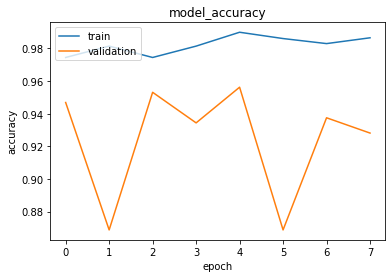

In [51]:
def plot_history(history):
  plt.plot(results1.history['accuracy'])
  plt.plot(results1.history['val_accuracy'])
  plt.title("model_accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train', 'validation'], loc="upper left")
  plt.show()

plot_history(results1)

In [52]:
preds = model1.evaluate(test_x, test_y)
print(f'loss = {preds[0]}')
print(f'test_accuracy = {preds[1]}')

13/13 [==============================] - 20s 1s/step - loss: 0.1961 - accuracy: 0.9425
loss = 0.19613485038280487
test_accuracy = 0.9424999952316284


In [53]:
from keras.preprocessing import image

In [76]:
_file = '/content/drive/MyDrive/IQ_gateway_Assignment/Data/unseen_test_data/C241NThinF_IMG_20151207_124643_cell_45.png'

_img = image.load_img(_file, target_size=(224, 224))

_img = image.img_to_array(_img)

_img = np.expand_dims(_img, axis=0)
_img = _img/255

In [77]:
prediction_prob = model1.predict(_img)

In [78]:
print(prediction_prob)

[[1.11555096e-07 9.99999881e-01]]


In [79]:
x = np.argmax(prediction_prob, axis=1)

In [80]:
print(x)

[1]


In [88]:
def label(result):
  x = np.argmax(result, axis=1)
  if x == [0]:
    print('Parasitized')
  else:
    print('Uninfected')

In [96]:
label(prediction_prob)

Uninfected
